# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np

# para pintar
import pylab as plt
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
# your code here

data=pd.read_csv('../data/Fitbit2.csv')

data

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

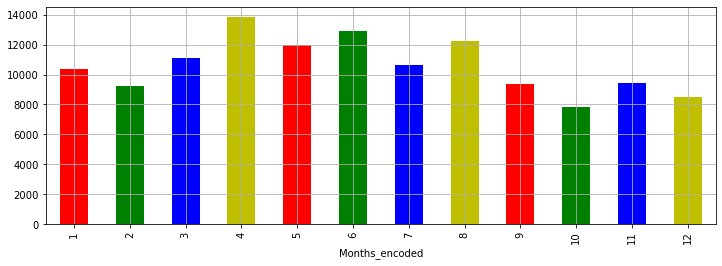

In [3]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

steps=data.groupby('Months_encoded').median()['Steps']

steps

ax=(steps).plot(kind='bar',figsize=(12, 4),color=['r', 'g', 'b', 'y'], grid=True,);

plt.savefig('../images/steps_month.jpg')

In [4]:
steps.info()

<class 'pandas.core.series.Series'>
Int64Index: 12 entries, 1 to 12
Series name: Steps
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


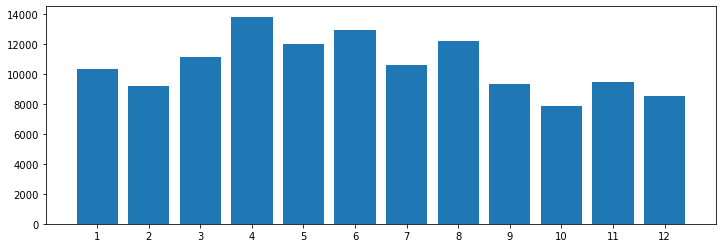

In [5]:
plt.figure(figsize=(12,4))

y_pos = np.arange(len(steps))

# Create bars
plt.bar(y_pos, steps)

# Create names on the x-axis
plt.xticks(y_pos, steps.index)

# Show graphic
plt.show()

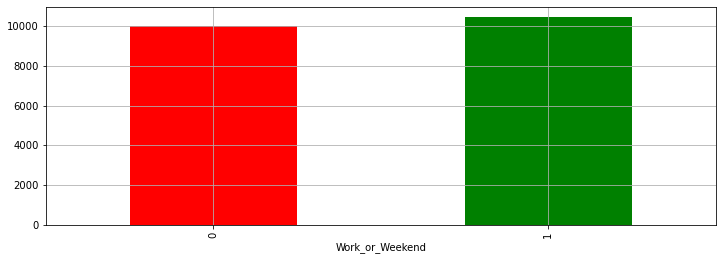

In [6]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
steps2=data.groupby('Work_or_Weekend').median()['Steps']

steps2

ax=(steps2).plot(kind='bar',figsize=(12, 4),color=['r', 'g', 'b', 'y'], grid=True,);

plt.savefig('../images/steps_work.jpg')


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [7]:
steps_sca=data[['Steps', 'Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']]

steps_sca

,Steps,Minutes Lightly Active,Minutes Very Active,Minutes Sedentary
0,905,46,0,1.355
1,18925,316,60,611.000
2,14228,226,77,602.000
3,6756,190,4,749.000
4,502,171,0,876.000
...,...,...,...,...
362,18588,275,79,599.000
363,16382,333,55,684.000
364,21913,287,90,701.000
365,19023,298,85,575.000


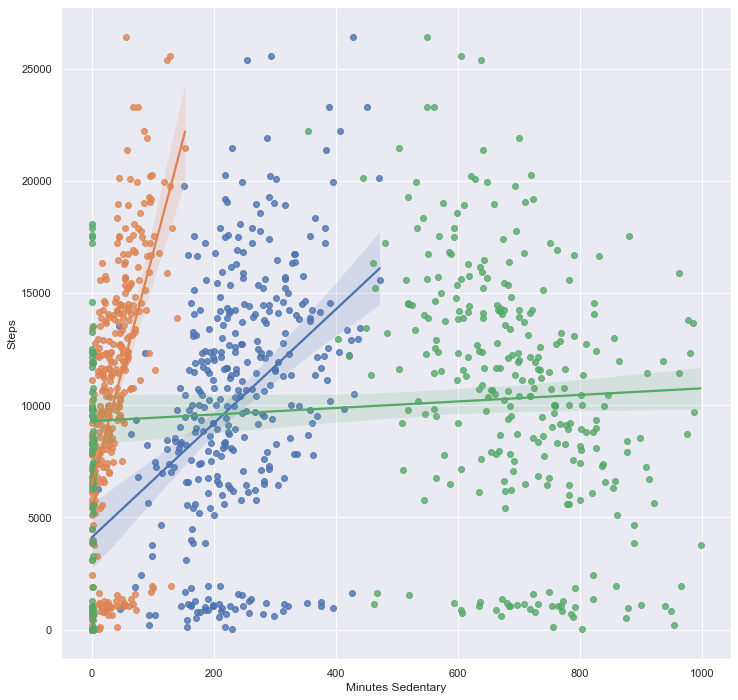

In [8]:
# your code here


lista=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary'] 

sns.set(rc={'figure.figsize':(12,12)})

for e in lista:
    
    sns.regplot(y=data["Steps"], x=data[e])
 
plt.savefig('../images/scatter.jpg')


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [9]:
# your code here

titanic=pd.read_csv('../data/titanic.csv')

titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [10]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [11]:
# NUMERICAL VARIABLES
# your code here

titnum=titanic.select_dtypes(exclude= 'object' )

titnum

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [12]:
# CATEGORICAL VARIABLES
# your code here

titanic_obj=titanic.select_dtypes(include='object' )

titanic_obj

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [13]:
# your code here

sns.set_style("white")
sns.set(rc={'figure.figsize':(12,6)})

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:ylabel='Age'>

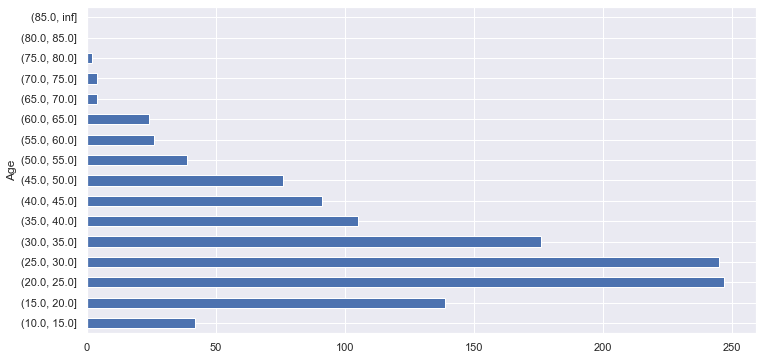

In [14]:
# your code here

age_groups = pd.cut(titnum['Age'], bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85, np.inf])

titnum.Age.groupby(age_groups).aggregate('count').plot.barh(figsize=(12,6))

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

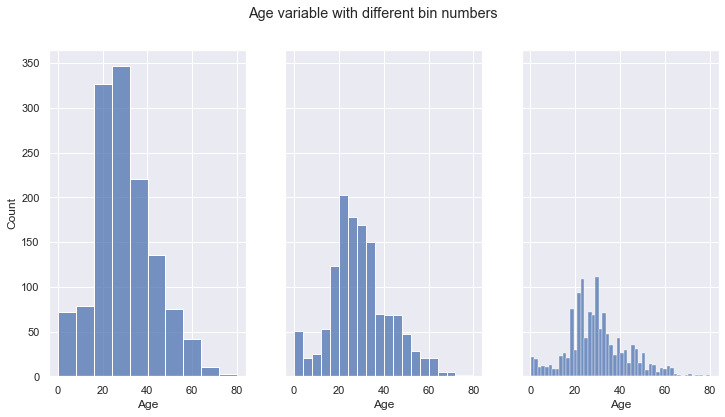

In [15]:
# your code here

fig, axes = plt.subplots(1,3, figsize=(12, 6), sharey=True)
fig.suptitle('Age variable with different bin numbers')
lista_bins=[10,20,50]
for i,e in enumerate(lista_bins):
    sns.histplot(ax=axes[i], data=titnum['Age'], bins=e)




#### How does the bin size affect your plot?

In [16]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

In [17]:
# your code here

sns.histplot(x=titnum['Age'], bins=ancho[0])

NameError: name 'ancho' is not defined

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:xlabel='Gender', ylabel='Count'>

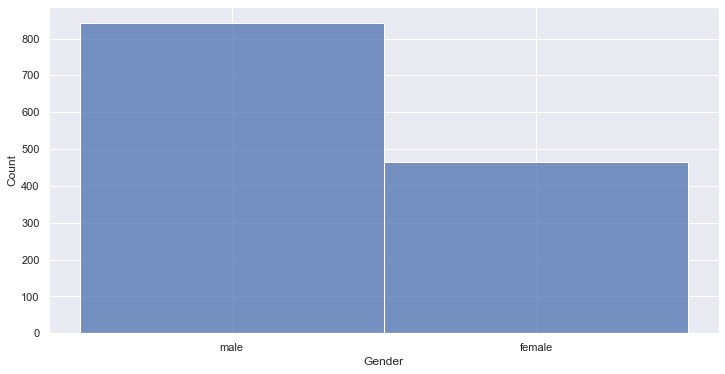

In [ ]:
# Method 1 - matplotlib
# your code here

sns.histplot( data=titanic.Gender)

<AxesSubplot:ylabel='Gender'>

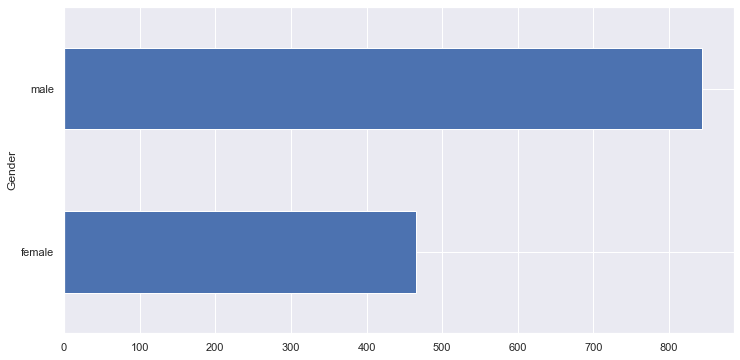

In [ ]:
# Method 2 - seaborn
# your code here

titanic.Gender.groupby(titanic.Gender).aggregate('count').plot.barh(figsize=(12,6))

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:ylabel='Pclass'>

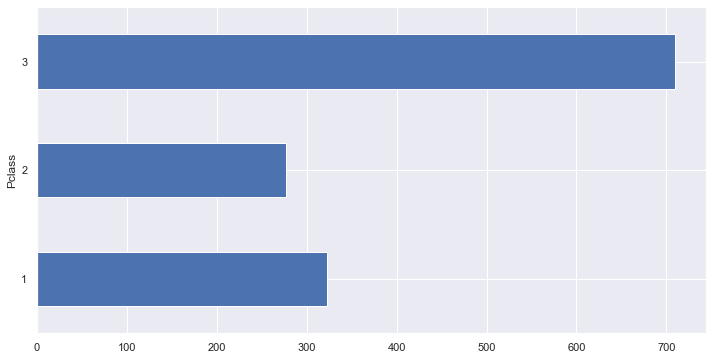

In [ ]:
# your code here

titanic.Pclass.groupby(titanic.Pclass).aggregate('count').plot.barh(figsize=(12,6))

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
esta=titanic.Age.describe()

esta

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

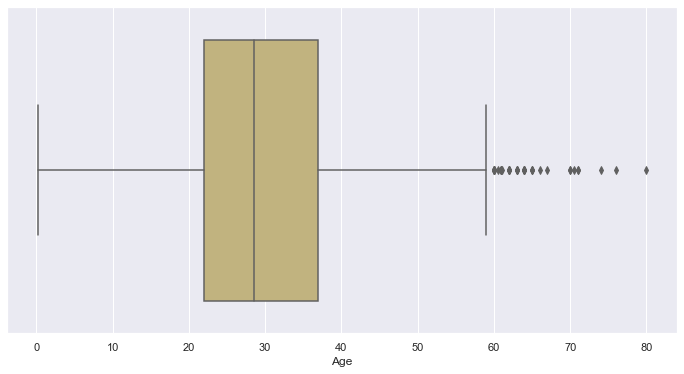

In [ ]:
# your code here

sns.boxplot(x=titanic.Age, color='y');

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

Several ages over 60ths are out of the span. 
"""



#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

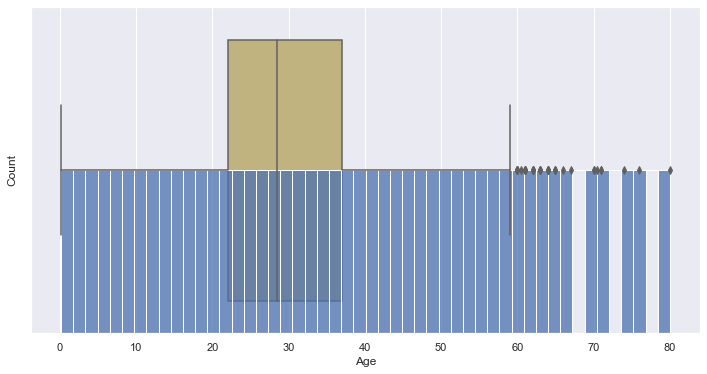

In [ ]:
# your code here

sns.histplot(x=titnum['Age'], bins=50)
sns.boxplot(x=titanic.Age, color='y')


<AxesSubplot:xlabel='Age'>

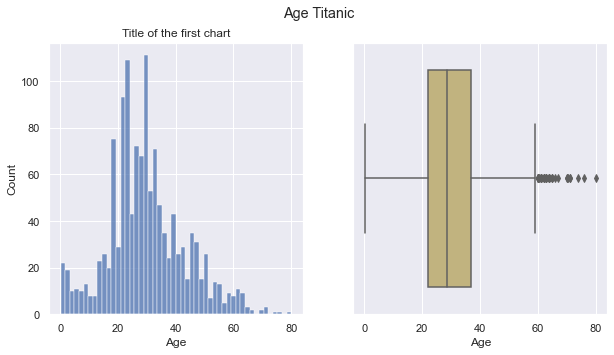

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Age Titanic')
axes[0].set_title('Title of the first chart')

sns.histplot(ax=axes[0], x=titnum['Age'], bins=50)
sns.boxplot(ax=axes[1], x=titanic.Age, color='y')




#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

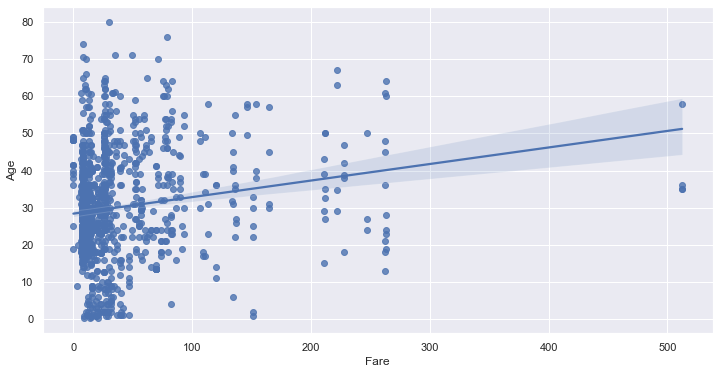

In [ ]:
# Method 1 - matplotlib
# your code here

sns.regplot(y=titanic.Age, x=titanic.Fare)

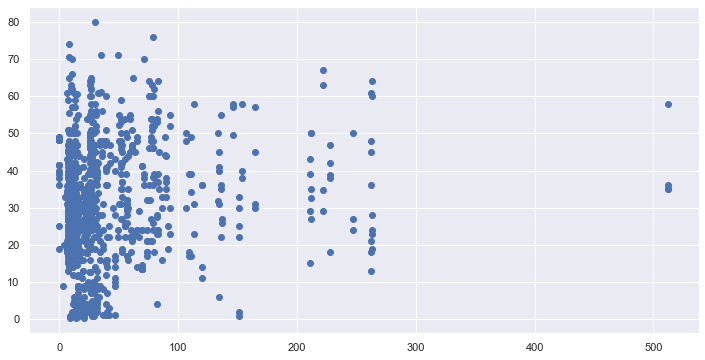

In [ ]:
# Method 2 - seaborn
# your code here

plt.scatter(y=titanic.Age, x=titanic.Fare)
plt.show()

#### Plot the correlation matrix using seaborn.

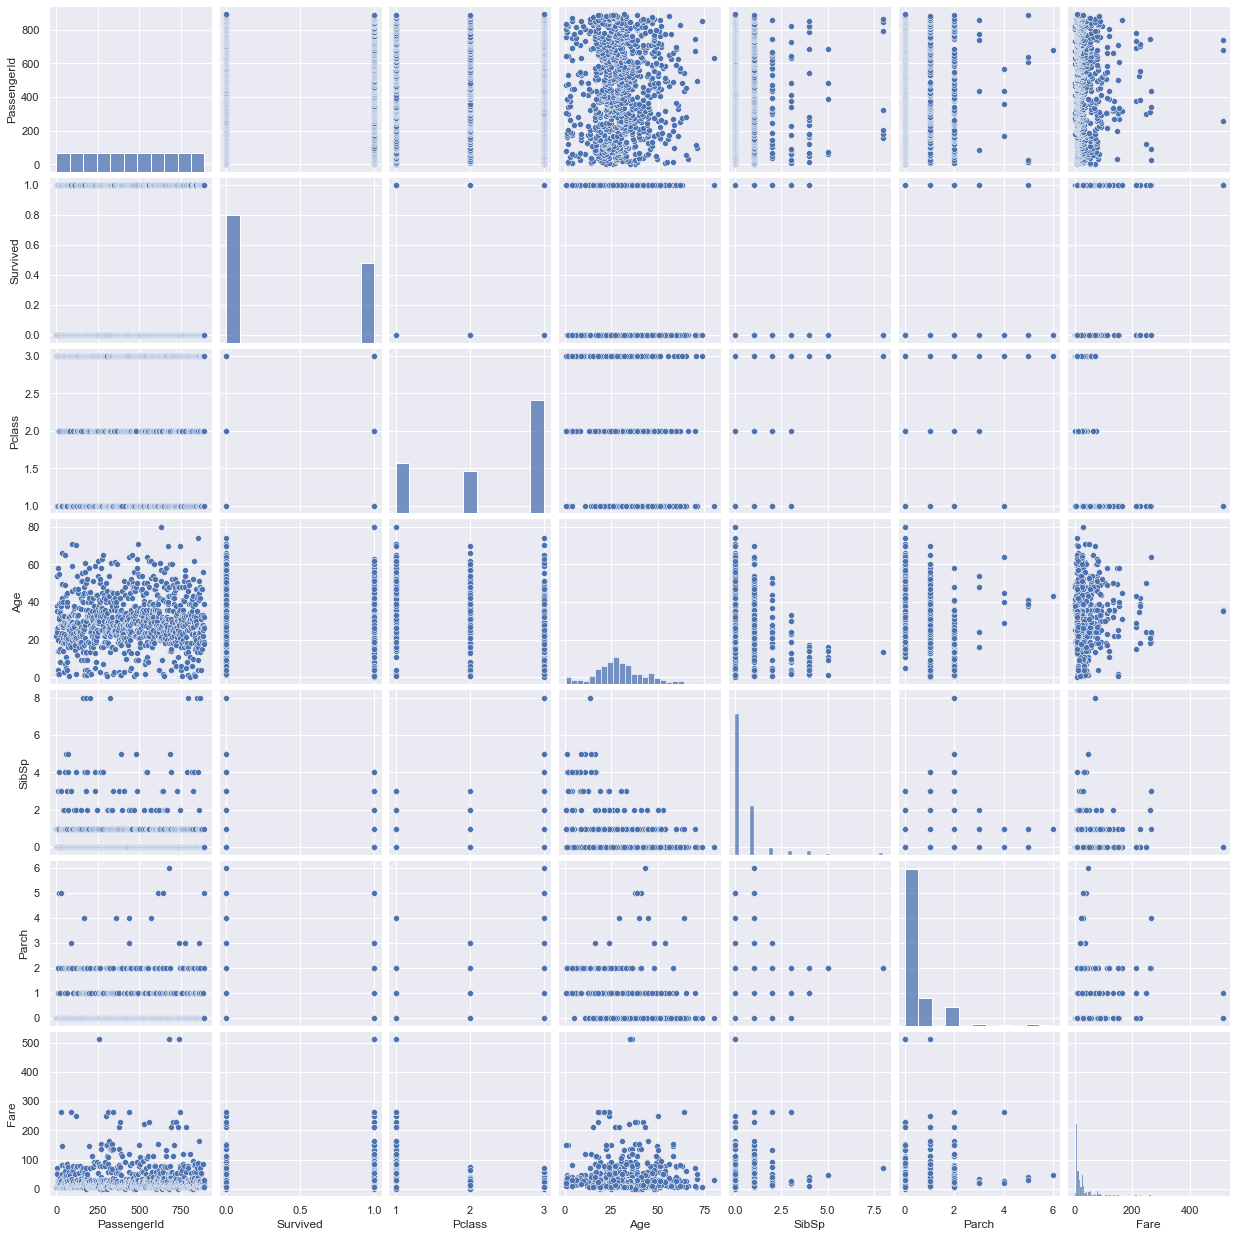

In [ ]:
# your code here

sns.pairplot(titanic.dropna());

In [ ]:
corr=titanic.corr(method='pearson')

corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


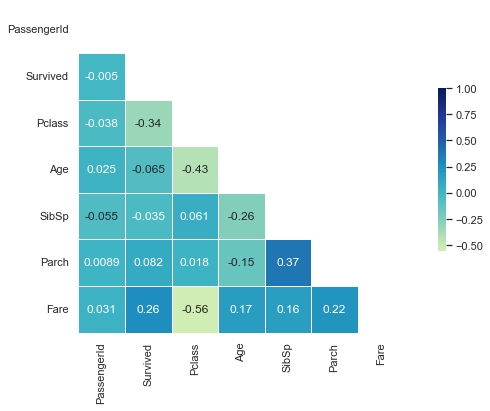

In [ ]:
sns.set(style='white')     # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores


cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,
            mask=mascara,
            cmap='YlGnBu',
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           );

#### What are the most correlated features?

In [ ]:
"""

pclass-Fare
pclass-Age
sibsp-Parch
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

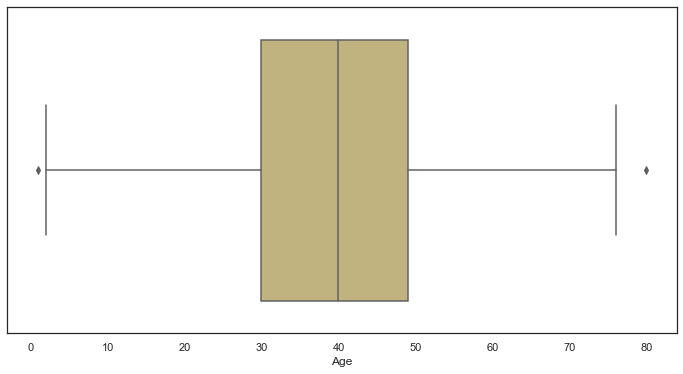

In [ ]:
# your code here


sns.boxplot(x=titanic[titanic.Pclass==1].Age, color='y');  # esto seria sin outliers


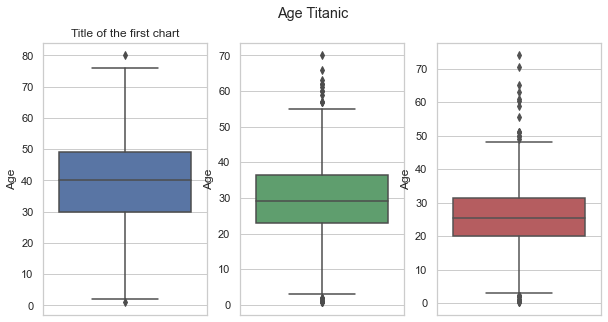

In [ ]:
sns.set_style("whitegrid")

ax.set_xlim(1,85)

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(10,5))

fig.suptitle('Age Titanic')
axes[0].set_title('Title of the first chart')

sns.boxplot(ax=axes[0],y=titanic[titanic.Pclass==1].Age, color='b', );
sns.boxplot(ax=axes[1],y=titanic[titanic.Pclass==2].Age, color='g');
sns.boxplot(ax=axes[2],y=titanic[titanic.Pclass==3].Age, color='r');



[Text(0.5, 1.0, 'Points by Team')]

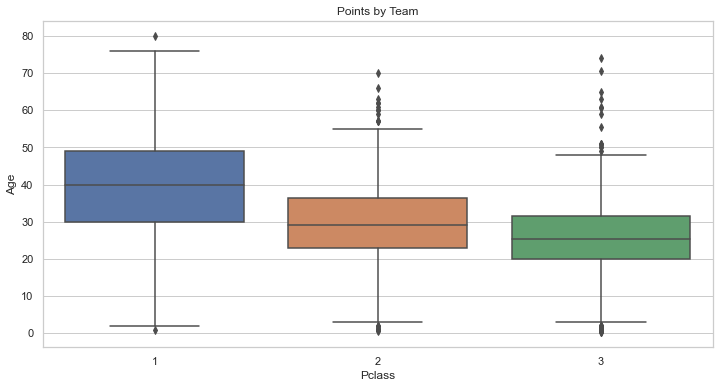

In [ ]:
sns.boxplot(data=titanic, x='Pclass', y='Age').set(title='Points by Team')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

[Text(0.5, 1.0, 'Points by Team')]

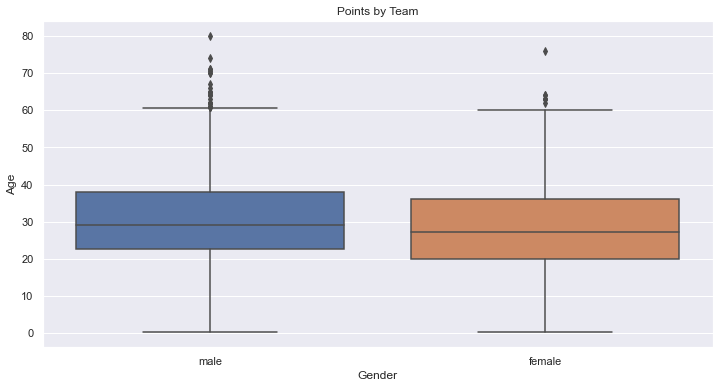

In [18]:
# your code here

sns.boxplot(data=titanic, x='Gender', y='Age').set(title='Points by Team')

TypeError: can't multiply sequence by non-int of type 'float'

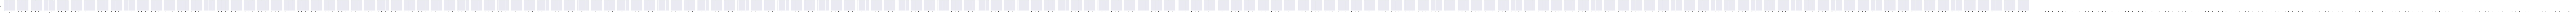

In [22]:


df = sns.load_dataset('tips')
  

graph = sns.FacetGrid(titanic, col ='Age', hue ='Gender')


graph.map(sns.regplot, "Age", "Gender").add_legend()


plt.show()
